<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/p605_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80(metric)_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 코랩에서 한글 문제 해결  
- 아래 코드 설치를 한다.  
- 코랩 런타임 -> 런타임 다시 시작 한다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 구글 드라이버 연동

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python/dataanalysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python/dataanalysis


- 분류의 평가방법은 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 정확도만 가지고 판단했다가는 잘못된 평가 결과게 빠질 수 있다. 

- 0 또는 1, 긍정 또는 부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시 되는 경우가 많다.  

- 분류의 성능 평가 지표(암기)  
① 정확도(Accuracy)  
② 오차행렬(Confusion Matrix)  
③ 정밀도(Precision)  
④ 재현율(Recall)  
⑤ F1 스코어  
⑥ ROC AUC  

### 1. 정확도 (Accuracy)  
$정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수 }{전체 예측데이터 건수}$

- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다.  
- 하지만 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 Classifier이다.

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

 앞에 타이타닉 예시에서 했던 전처리와 동일하게 처리

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

정확도 측정

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./dataset/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


불균형한 이진 분류로 만들기 위해 숫자 '7'만 True 나머지 숫자는 False로 설정

- 마찬가지로 fit은 아무것도 하지 않음
- predict에서는 무조건 0을 반환함
- 모든 예측을 다 0으로 하는 것! (모두 7이 아닌 다른 숫자라고 예측)
- 당연히 모델로서 말이 안 되는데 이것의 정확도를 측정

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


정확도 예측

In [7]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
# 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)

fakepred = fakeclf.predict(X_test)
cf = confusion_matrix(y_test,fakepred)
print('confusion_matrix')
print()
print(cf)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

#결과값은 훈련할 때마다 다를 수 있음

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
confusion_matrix

[[405   0]
 [ 45   0]]
모든 예측을 0으로 하여도 정확도는:0.900


- 모든 예측을 0으로 했지만, 0 (7이 아닌 숫자)이 1 (숫자 7)보다 훨씬 많은 불균형 데이터였기 때문에, 정확도가 무려 90%가 나왔다. 

- 이렇게 두 가지 예제로 불균형 데이터에서 정확도의 성능 평가지표로서 한계를 보였다 

### 2 오차행렬 = 오분류표=혼동행렬
- 이진 분류에서 성능 지표로 오차행렬(confusion matrix, 혼동 행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다.


![confusion](https://velog.velcdn.com/images/gangjoo/post/c6d9396b-15b1-4325-b429-50ca9fc3210c/image.png)


- TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
- FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
- FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
- TP는 예측값을 Positive갑 1로 예측했는데 실제 값 역시 Positive 값 1

정확도(Accuracy) = 예측  결과와 실제 값이 동일한 건수 / 전체 데이터수 = (TN + TP ) / (TN + FP + FN + TP) 

**예측이 맞으면 앞이 T, 틀리면 F
예)TN = T:맞게예측함 N:결과가 Negative라는 것을

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공

<AxesSubplot:>

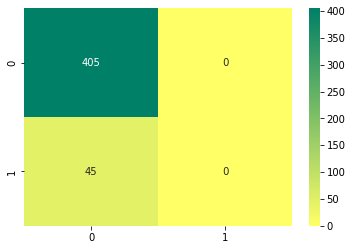

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, fakepred), annot=True, fmt='2.0f', cmap='summer_r')

### 3 정밀도(Precision)와 재현율(Recall)

 
정밀도(Precision) = TP  / (FP + TP)  
재현율(Recall) = TP / (FN + TP)  
재현율(Recall)=민감도(Sensitivity)=TPR(True Positive Rate)


- 분균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있다.
- 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 암 판단 모델, 보험 사기등의 금융 사기 적발 모델이다.
- 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 스팸 메일 여부를 판단하는 모델이다.
-재현율과 정밀도 모두 TP를 높이는데 초점을 맞추지만, 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춘다.
- 사이킷런은 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score()를 API로 제공한다.


평가를 간편하게 적용하기 위해서 confusion matrix, accuracy, precision, recall등의 평가를 한번에 호출하는 get_clf_eval()함수를 만들고 타이타닉 데이터를 가공해 로지스틱 회귀로 분류를 수행

In [9]:
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # 원래 책에 있는 print(confusion)인데 안예뻐서 seaborn의 heatmap 사용
    sns.heatmap(confusion, annot=True, fmt='2.0f', cmap='summer_r')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

(891, 8)
(712, 8)
(179, 8)
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


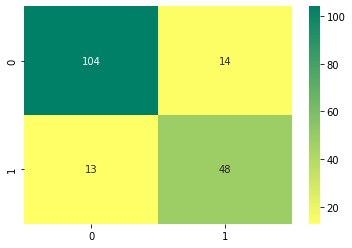

In [10]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./dataset/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

print(X_titanic_df.shape)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
print(X_train.shape)
print(X_test.shape)  #테스트한 결과 총 179개

lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train, y_train)  #훈련시킴
pred = lr_clf.predict(X_test) #예측함
get_clf_eval(y_test, pred)  #y_test:실제값, pred:예측값




실제 죽음  생존 예측  
죽음 예측   실제 생존

정밀도/재현율 트레이드오프

- 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율 트레이드오프(Trade-off)라고 한다.
- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게 된다.
- 가령 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%,1이될 확률이 90%로 예측됐다면 최종 예측은 더 큰 확률을 가진, 즉 90% 확률을 가진 1로 예측한다.
- 일반적으로 이진 분류에서는 이 임계값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다.
- 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다. 
- predict_proba( )메서드는  학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다. 
- predict()메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과이다. 
- 이진 분류에서 predict_proba( )를 수행해 반환되는 ndarry는 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 컬럼이 클래스 값 1에 대한 예측 확률이다.


In [11]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba() 결과 shape: {pred_proba.shape}')
print(f'pred_proba array에서 앞 3개만 샘플로 추출:\n{pred_proba[:3]}')

# 예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(f'두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:\n{pred_proba_result[:3]}')

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출:
[[0.4621693  0.5378307 ]
 [0.87879062 0.12120938]
 [0.87724729 0.12275271]]
두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:
[[0.4621693  0.5378307  1.        ]
 [0.87879062 0.12120938 0.        ]
 [0.87724729 0.12275271 0.        ]]


사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값(위의 예제는 0.5)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정한다. 사이킷런의 Binarizer 클래스를 이용해서 이 로직을 구현한다.

In [12]:
# 이해를 돕기위한 Binarizer 예제
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0 , 0],
    [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0, 크면 1
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


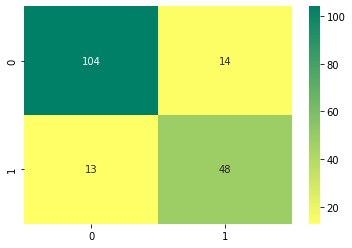

In [14]:
custom_threshold = 0.5  #임계값을 0.5로 주고 새로 훈련, 결과값 출력

# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


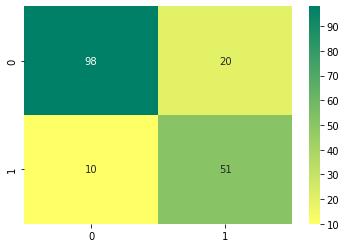

In [15]:
# Binarizer의 threshold 설정값을 0.4로 설정, 즉 분류 결정 임계값을 0.5에서 0.4로 낮춤
custom_threshold_2 = 0.4
pred_proba_2 = pred_proba[:, 1].reshape(-1, 1)
binarizer_2 = Binarizer(threshold=custom_threshold_2).fit(pred_proba_2)
custom_predict_2 = binarizer_2.transform(pred_proba_2)

get_clf_eval(y_test, custom_predict_2)

임계값을 낮추니 재현율 값이 올라가고 정밀도가 떨어졌다. 이유는 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 된다. 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임계값을 낮출수록 True 값이 많아지게 된다.(따라서 암 진단처럼 넓게 계산해야 하는 부분에서 임계값을 0.4로 설정해야 한다)

![임계값](https://user-images.githubusercontent.com/76269316/124445451-87630080-ddba-11eb-8a42-899cea80c606.png)

Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문이다.

[임계값 0.5일때 오차 행렬]


| TN (108) | FP (10) |
|---|---|
| FN(14)   | TP (47) |




[임계값 0.4일때 오차 행렬]


| TN (97) | FP (21) |
|---|---|
| FN(11)   | TP (50) |
  
  

임계값이 낮아지면서 TP가 48에서 51로 늘었고, FN이 13에서 10으로 줄었다. 따라서 재현율이 0.8361로 좋아졌고,

FP는 14에서 19로 늘면서 정밀도가 0.7286으로 나빠졌다.

임계값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표 조사

임계값:  0.4
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임계값:  0.45
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임계값:  0.5
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임계값:  0.55
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임계값:  0.6
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


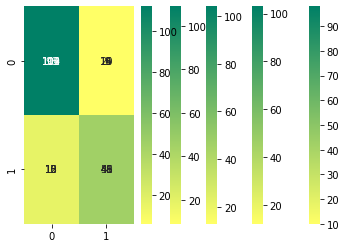

In [16]:
#테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
      
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

위에서는 get_eval_by_threshold 사용자 정의 함수를 사용했는데, 사이킷런에서는 precision_recall_curve() API를 제공한다.

입력 파라미터  
  > y_true : 실제 클래스값 배열 (배열 크기 = [데이터 건수])  
  > probas_pred : positive column의 예측 확률 배열 (배열 크기 = [데이터 건수])  

반환 값   
  >  정밀도 : 임계값별 정밀도 값을 배열로 반환  
  > 재현율 : 임계값별 재현율 값을 배열로 반환  

In [17]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape: ', thresholds.shape)

#반환된 임계값 배열 row가 143건이므로 샘플로 10건만 추출, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개: ',thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape:  (165,)
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값:  [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임계값별 정밀도:  [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


추출된 샘플 10개에 해당하는 정밀도와 재현율 값을 보면, 임계값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있다.  
precision_recall_curve() API는 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화할 수 있다.

precision_recall_curve_plot()을 이용한 임계값에 따른 정밀도와 재현율을 시각화

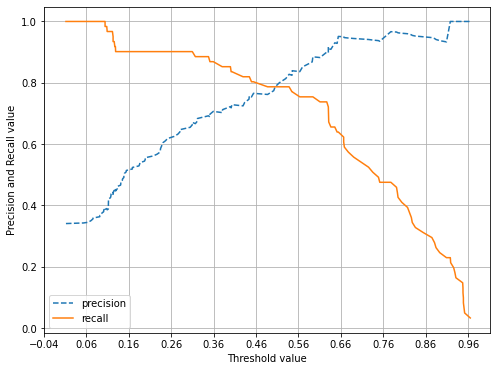

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 실행. (정밀도는 점선으로 표시_
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()  #X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))  #X축에 눈금 표시
    
    #X축, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value'); 
    plt.ylabel('Precision and Recall value');
    plt.legend();
    plt.grid()  #범례, 격자 표시
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

- 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변한다.  
- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아진다.  
- 임계값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 된다.

정밀도가 100%가 되는 방법(극단적으로 100%로 만드는 방법, 사용하는 방법 아님)    
- 확실한 기준이 되는 경우만 positive로 예측하고 나머지는 모두 negative로 예측한다.
- $정밀도(Precision) = \frac{TP}{FP+TP}$
- 예를 들어, 전체 환자 1000명 중 확실한 positive 징후만 가진 환자가 단 한명이라고 하면 이 한 명만 positive로 예측하고 나머지는 모두 negative로 예측하더라도 FP = 0, TP = 1이 되므로 1/(1+0)이 되서 100%가 된다.

재현율이 100%가 되는 방법(참고)  

- 모든 환자를 positive로 예측한다.
- $재현율(Recall)= \frac{TP}{FN+TP}$
- 전체 환자 1000명을 다 positive로 예측하면 이 중 실제 양성인 사람이 30명이여도 TN이 수치에 포함되지 않고, FN은 아예 0이므로 30/(30+0)으로 100%가 된다.
- 분류가 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만,극단적으로 정밀도와 재현율 중 한 쪽만을 강조하는 상황이 돼서는 안된다.


### 4  F1 스코어

- F1 스코어(Score)는 정밀도와 재현율을 결합한 지표이다. 
- F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.
- F1 스코어 공식  
 $F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 * \frac{precision * recall}{precision + recall} $
- 사이킷런은 F1 스코어를 구하기 위해 f1_score()라는 API를 제공한다.

In [22]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

y_true = np.array([0, 1, 0, 0])
y_pred = np.array([0, 1, 1, 0])
print(confusion_matrix(y_true, y_pred))

print(precision_score(y_true, y_pred))

[[2 1]
 [0 1]]
0.5


In [23]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


임계값을 변화시키면서 F1 스코어를 포함한 평가 지표

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    #F1 스코어 print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./dataset/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)  #712개의 학습 데이터, 179개의 테스트 데이터

lr_clf = LogisticRegression(max_iter=500)

lr_clf.fit(X_train, y_train)

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값:  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
임계값:  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
임계값:  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
임계값:  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
임계값:  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


임계값이 0.6일 때 F1 스코어가 가장 좋으나, 재현율이 크게 감소한다.

### 5  ROC곡선과 AUC

- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.
- ROC 곡선(Receiver Operation Characteristic Curve)은 우리말로 수신자 판단 곡선으로 불린다.
- 원래 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치이며, 일반적으로 의학 분야에서 많이 사용되지만 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 한다.
- ROC 곡선은 FPR(False Positive Rate)이 변할 때, TPR(True Positive Rate)이 어떻게 변하는 지를 나타내는 곡선이다. (FPR을 X축으로, TPR을 Y축으로 두고 그린 그래프)
- TPR은 True Positive Rate의 약자이며, 이는 재현율을 나타낸다. 즉 재현율은 민감도로도 불린다. 그리고 민감도에 대응하는 지표로 TNR(True Negative Rate)이라고 불리는 특이성(Specificity)이 있다.
   - 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타낸다. (질병이 있는 사람은 질병이 있는 것으로 양성 판정)

$$ TPR =  \frac{TP}{FN+TP}$$
   - 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다.(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)
$$ TNR =  \frac{TN}{FP+TN}$$



- FPR(Flase Positive Rate)은 FP / (FP + TN)이므로 1 - TNR= 1- 특이성
![FPR](https://community.jmp.com/t5/image/serverpage/image-id/32325i237836D117E0305E/image-size/large?v=v2&px=999)
- 가운데 직선은 ROC 곡선의 최저 값으로, 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류 ROC 직선이다.
- ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난다.
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구한다.
- FPR은 분류 결정 임계값을 변경함으로써 변경할 수 있다.